# Factors Affecting Borrower APR in Prosper Loans
## by Chris Eldredge

## Investigation Overview

We will analyze which characterics affect a loan’s APR and outcome status.

## Dataset Overview

This data set contains 113,937 loans from Prosper. The dataset includes loan amount, borrower rate (or interest rate), current loan status, and many other features.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_raw = pd.read_csv('prosperLoanData.csv')
df = df_raw[['ListingKey','Term','LoanStatus','BorrowerAPR','ProsperScore','Occupation','EmploymentStatus','CreditScoreRangeUpper','DelinquenciesLast7Years','BankcardUtilization','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationQuarter']]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loans By Borrower APR 
Borrower APR is between 0.05% to 0.4% for most loans

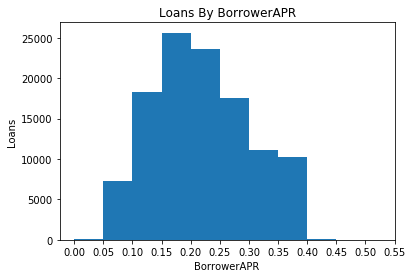

In [4]:
#plot histogram of loans by BorrowerAPR
bins = np.arange(0, df['BorrowerAPR'].max(), 0.05)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('Loans By BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('Loans')
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));

## Feature Correlation

One of the strongest correlations is between ProsperScore and BorrowerAPR. As ProsperScore increases, BorrowerAPR decreases. This correlation makes sense, as ProsperScore is likely used to determine what interest rate to offer a borrower.

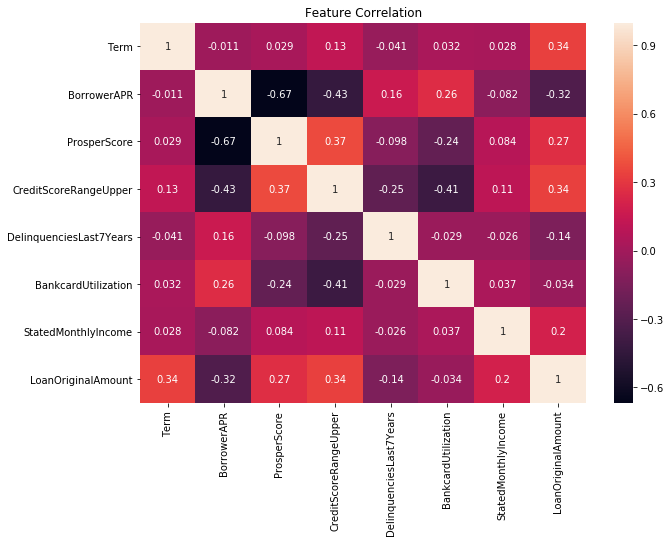

In [5]:
#plot correlation matrix
plt.figure(figsize = [10, 7])
sb.heatmap(df.corr(),annot=True);
plt.title('Feature Correlation');

## Prosper Score and APR By Loan Status
Looking at the Defaulted category, there were loans that defaulted across all levels of ProsperScore, but mostly concentrated in the mid to lower scores. This indicates most borrowers that defaulted were paying a higher APR, suggesting that Prosper is correctly identifying riskier borrowers.

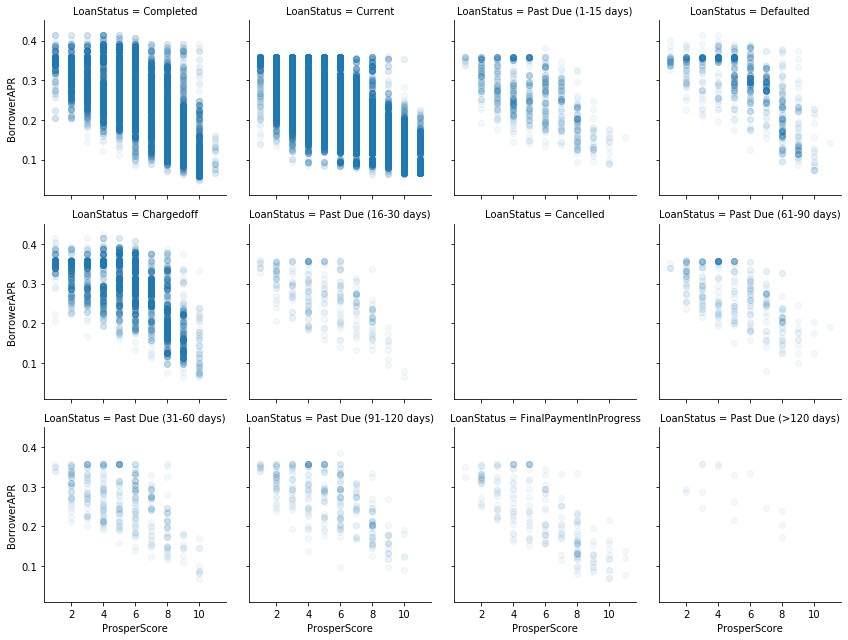

In [7]:
#plot ProsperScore and BorrowerAPR by LoanStatus
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 4)
g.map(plt.scatter, 'ProsperScore', 'BorrowerAPR', alpha = 0.05);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!